In [140]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#load the dataset
df = pd.read_csv("/content/drive/MyDrive/COVID-19 Global - Dataset.csv")
df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"111,367,209",NaN,"1,199,031",NaN,"109,053,249",NaN,"1,114,929","1,771","332,633","3,581","1,186,742,917","3,544,577","334,805,269"
1,India,"45,028,429",161,"533,475",2.0,NaN,NaN,NaN,NaN,"32,012",379,"935,879,495","665,334","1,406,631,776"
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013","2,556","271,490,188","4,139,547","65,584,518"
3,Germany,"38,819,284",574,"182,439",28.0,"38,240,600",NaN,"396,245",NaN,"462,776","2,175","122,332,384","1,458,359","83,883,596"
4,Brazil,"38,407,327",NaN,"709,765",NaN,"36,249,161",NaN,"1,448,401",NaN,"178,345","3,296","63,776,166","296,146","215,353,593"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Total:,"69,791,773",NaN,"1,365,551",NaN,"66,648,277",NaN,"1,777,945","8,953",NaN,NaN,NaN,NaN,NaN
235,Total:,"14,826,780","1,345","32,665",NaN,"14,572,565",NaN,"221,550",33,NaN,NaN,NaN,NaN,NaN
236,Total:,"12,859,770",NaN,"258,884",NaN,"12,089,899",NaN,"510,987",529,NaN,NaN,NaN,NaN,NaN
237,Total:,721,NaN,15,NaN,706,NaN,0,0,NaN,NaN,NaN,NaN,NaN


In [167]:
# Print the data DataFrame without the to_string() method:
print(df.to_markdown())

|     | Country                | Total Cases   | New Cases   | Total Deaths   |   New Deaths | Total Recovered   | New Recovered   | Active Cases   | Serious, Critical   | Tot Cases/1M pop   | Deaths/1M pop   | Total Tests   | Tests/1M pop   | Population    |
|----:|:-----------------------|:--------------|:------------|:---------------|-------------:|:------------------|:----------------|:---------------|:--------------------|:-------------------|:----------------|:--------------|:---------------|:--------------|
|   0 | USA                    | 111,367,209   | nan         | 1,199,031      |          nan | 109,053,249       | nan             | 1,114,929      | 1,771               | 332,633            | 3,581           | 1,186,742,917 | 3,544,577      | 334,805,269   |
|   1 | India                  | 45,028,429    | 161         | 533,475        |            2 | nan               | nan             | nan            | nan                 | 32,012             | 379             | 935,879,4

In [168]:
# Overview about Columns, Range, Non-Null Value Counts, Memory Usage and Data Types (#df.dtpyes)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            239 non-null    object 
 1   Total Cases        239 non-null    object 
 2   New Cases          12 non-null     object 
 3   Total Deaths       234 non-null    object 
 4   New Deaths         7 non-null      float64
 5   Total Recovered    190 non-null    object 
 6   New Recovered      17 non-null     object 
 7   Active Cases       191 non-null    object 
 8   Serious, Critical  60 non-null     object 
 9   Tot Cases/1M pop   230 non-null    object 
 10  Deaths/1M pop      225 non-null    object 
 11  Total Tests        213 non-null    object 
 12  Tests/1M pop       213 non-null    object 
 13  Population         229 non-null    object 
dtypes: float64(1), object(13)
memory usage: 26.3+ KB
None


In [169]:
# Count rows and coulums & total cells in the dataset
print("Row numbers:",df.shape[0])
print("Column numbers:",df.shape[1])
print("Total cells:",df.size)

Row numbers: 239
Column numbers: 14
Total cells: 3346


In [170]:
# Remove all rows with NULL values:
for i in range(208,239):
  df=df.drop(i)
print(df.to_markdown())

|     | Country                | Total Cases   | New Cases   | Total Deaths   |   New Deaths | Total Recovered   | New Recovered   | Active Cases   | Serious, Critical   | Tot Cases/1M pop   | Deaths/1M pop   | Total Tests   | Tests/1M pop   | Population    |
|----:|:-----------------------|:--------------|:------------|:---------------|-------------:|:------------------|:----------------|:---------------|:--------------------|:-------------------|:----------------|:--------------|:---------------|:--------------|
|   0 | USA                    | 111,367,209   | nan         | 1,199,031      |          nan | 109,053,249       | nan             | 1,114,929      | 1,771               | 332,633            | 3,581           | 1,186,742,917 | 3,544,577      | 334,805,269   |
|   1 | India                  | 45,028,429    | 161         | 533,475        |            2 | nan               | nan             | nan            | nan                 | 32,012             | 379             | 935,879,4

In [171]:
# Detect missing/NAN values
df.isnull().sum()

Country                0
Total Cases            0
New Cases            200
Total Deaths           0
New Deaths           204
Total Recovered       44
New Recovered        194
Active Cases          44
Serious, Critical    158
Tot Cases/1M pop       0
Deaths/1M pop          0
Total Tests            9
Tests/1M pop           9
Population             0
dtype: int64

<Axes: >

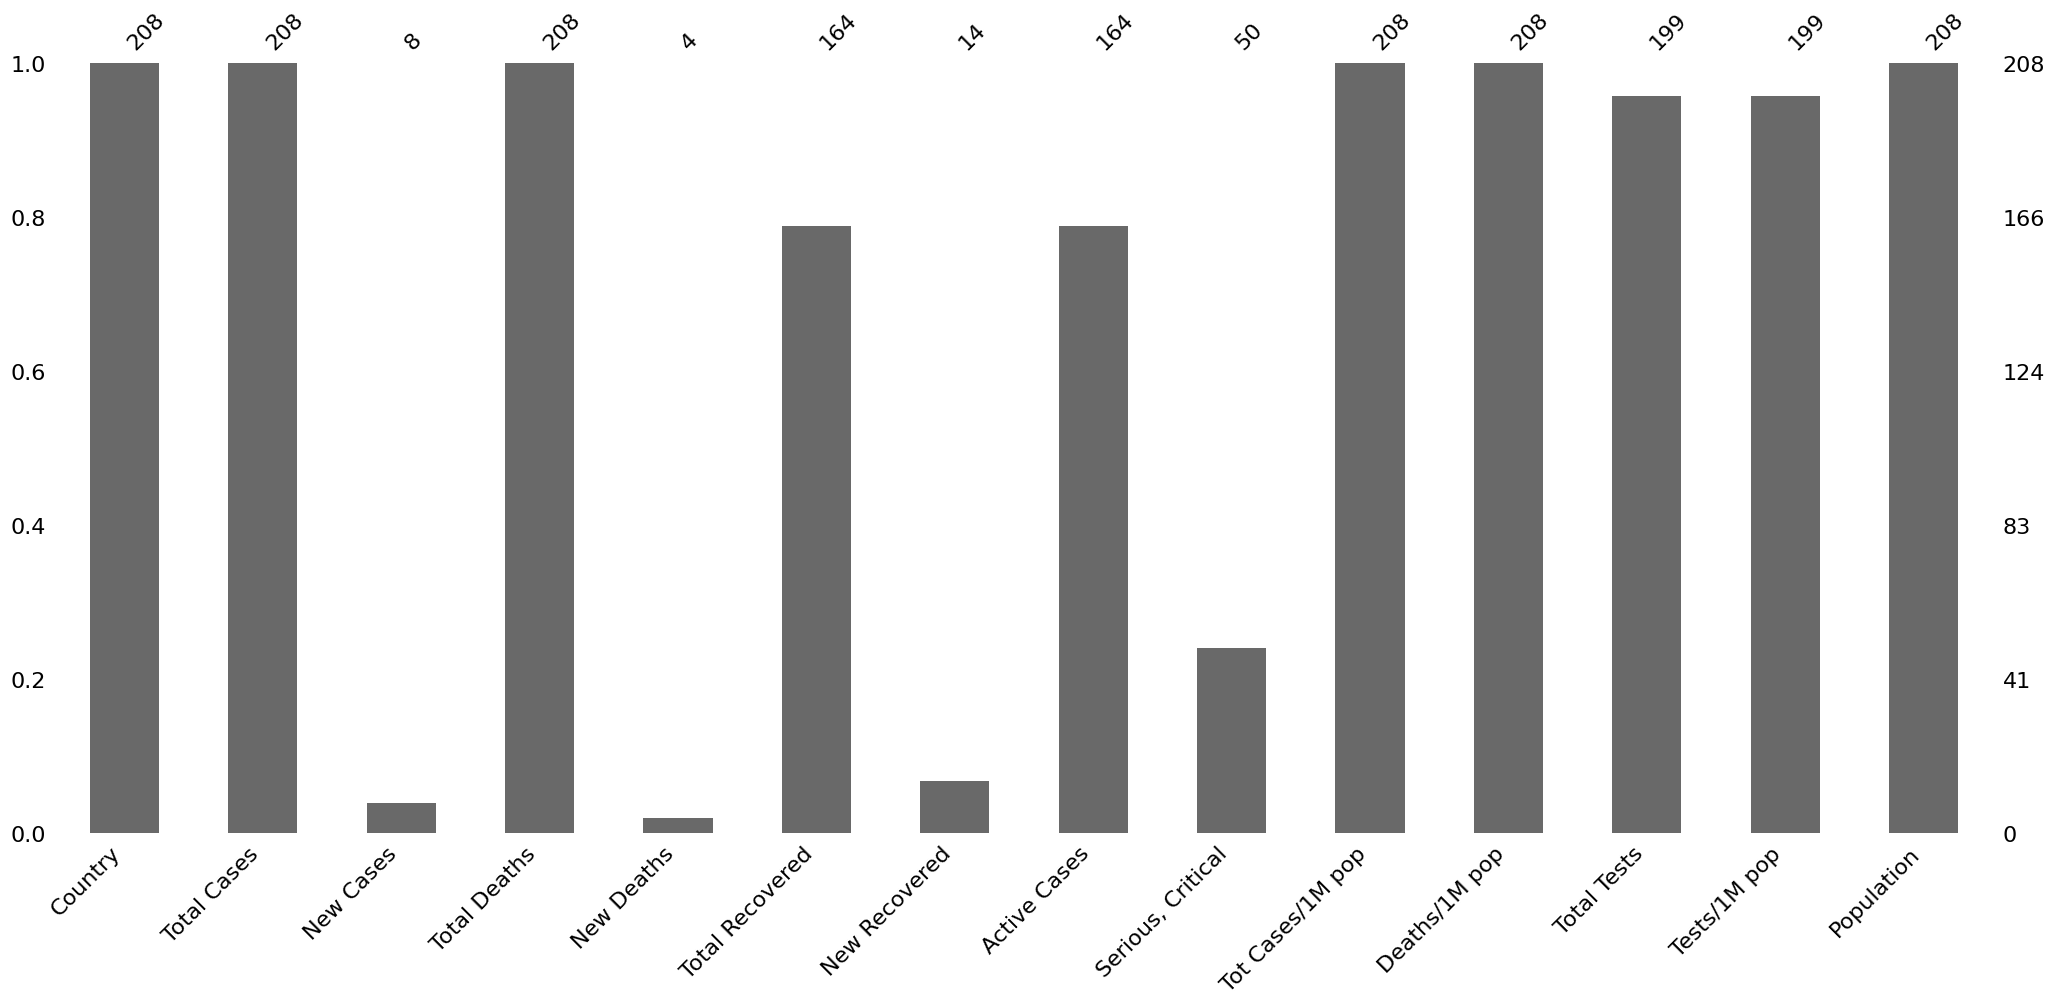

In [172]:
# Visualisation use missingno
import missingno as msno
msno.bar(df)

In [173]:
# Return a new Data Frame with no empty cells:
columns = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases',
           'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests', 'Tests/1M pop', 'Population']

for column in columns:
    df[column] = df[column].str.replace(',', '')

    df[column] = df[column].astype(float)

    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

    df[column] = df[column].astype(int)

print(df.to_markdown())


|     | Country                |   Total Cases | New Cases   |   Total Deaths |   New Deaths |   Total Recovered | New Recovered   |   Active Cases | Serious, Critical   |   Tot Cases/1M pop |   Deaths/1M pop |   Total Tests |   Tests/1M pop |   Population |
|----:|:-----------------------|--------------:|:------------|---------------:|-------------:|------------------:|:----------------|---------------:|:--------------------|-------------------:|----------------:|--------------:|---------------:|-------------:|
|   0 | USA                    |     111367209 | nan         |        1199031 |          nan |         109053249 | nan             |        1114929 | 1,771               |             332633 |            3581 |    1186742917 |        3544577 |    334805269 |
|   1 | India                  |      45028429 | 161         |         533475 |            2 |            275873 | nan             |            994 | nan                 |              32012 |             379 |     93587949

In [174]:
#drop colums that are not significant(if any):
df.drop(columns=['Serious, Critical'], inplace=True)
df.drop(columns=['New Recovered'], inplace=True)
print(df.to_markdown())

|     | Country                |   Total Cases | New Cases   |   Total Deaths |   New Deaths |   Total Recovered |   Active Cases |   Tot Cases/1M pop |   Deaths/1M pop |   Total Tests |   Tests/1M pop |   Population |
|----:|:-----------------------|--------------:|:------------|---------------:|-------------:|------------------:|---------------:|-------------------:|----------------:|--------------:|---------------:|-------------:|
|   0 | USA                    |     111367209 | nan         |        1199031 |          nan |         109053249 |        1114929 |             332633 |            3581 |    1186742917 |        3544577 |    334805269 |
|   1 | India                  |      45028429 | 161         |         533475 |            2 |            275873 |            994 |              32012 |             379 |     935879495 |         665334 |   1406631776 |
|   2 | France                 |      40138560 | nan         |         167642 |          nan |          39970918 |          

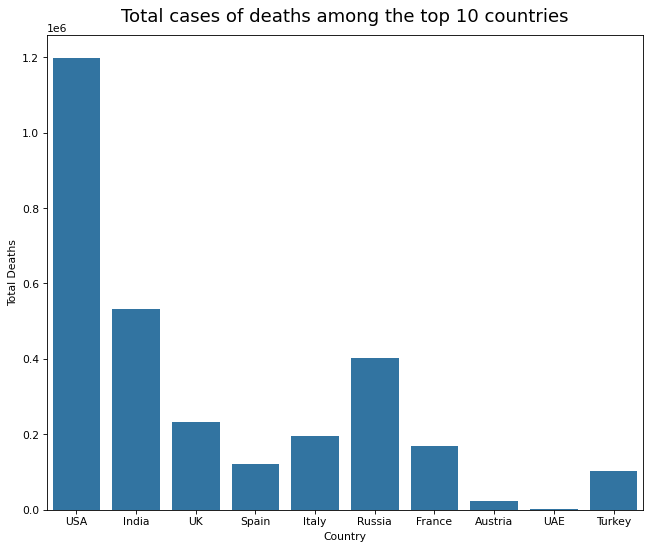

In [152]:
#perform bar plot of total cases of deaths among the top 10 countries considering tests
df_Ttest=df.sort_values(by='Total Tests',ascending=False)
df_Ttest=df_Ttest.head(10)
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Country", y="Total Deaths", data=df_Ttest)
plt.title("Total cases of deaths among the top 10 countries", size=17, pad=13)
plt.show()

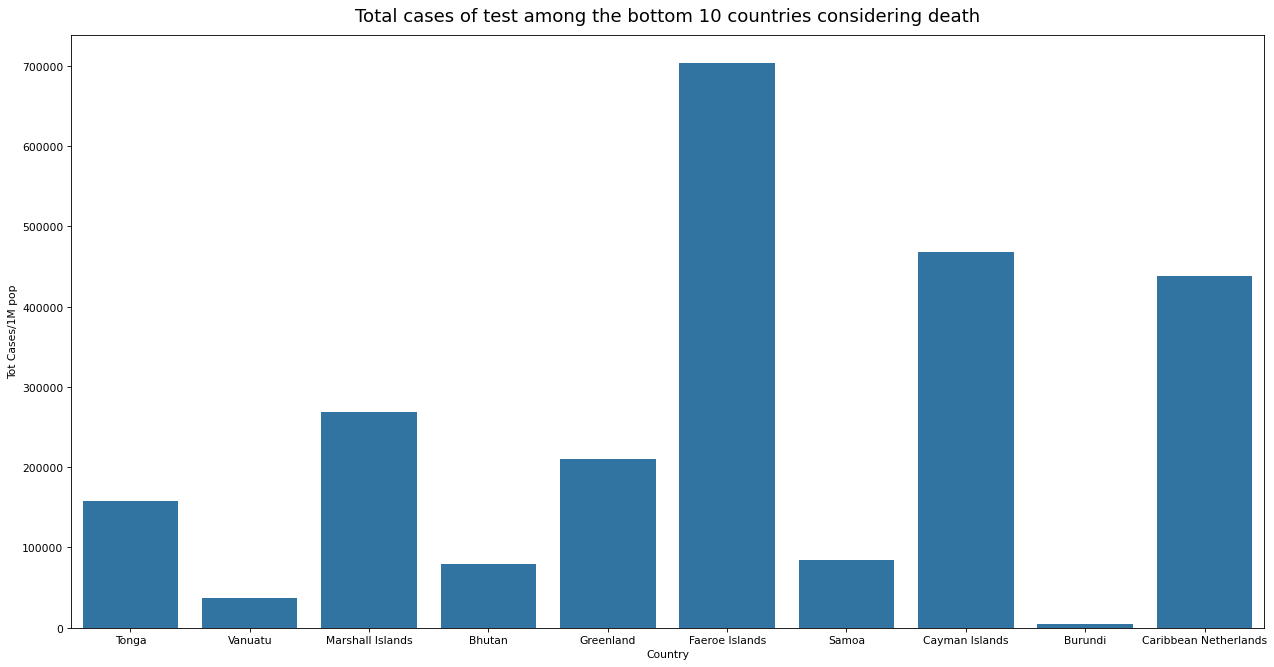

In [175]:
#perform count plot of total cases of test among the bottom 10 countries considering death
df_Bdeath=df.sort_values(by='Total Deaths')
df_Bdeath=df_Bdeath.head(10)
plt.figure(figsize=(20,10), dpi=77)
sns.barplot(x="Country", y="Tot Cases/1M pop", data=df_Bdeath)
plt.title("Total cases of test among the bottom 10 countries considering death", size=17, pad=13)
plt.show()

<ipython-input-181-e10b35ca9ca5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['New Cases'] = pd.to_numeric(df_cleaned['New Cases'])
<ipython-input-181-e10b35ca9ca5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['New Deaths'] = pd.to_numeric(df_cleaned['New Deaths'])


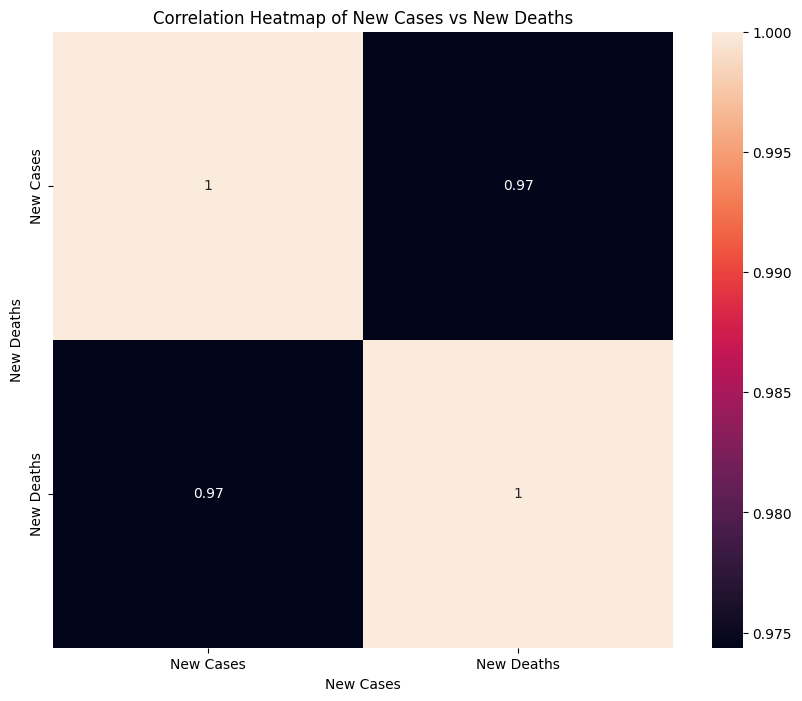

In [181]:
#heatmap of new cases vs new deaths

df_cleaned = df.dropna(subset=['New Cases', 'New Deaths'])

df_cleaned['New Cases'] = pd.to_numeric(df_cleaned['New Cases'])
df_cleaned['New Deaths'] = pd.to_numeric(df_cleaned['New Deaths'])

plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[['New Cases', 'New Deaths']].corr(), annot=True)
plt.title('Correlation Heatmap of New Cases vs New Deaths')
plt.xlabel('New Cases')
plt.ylabel('New Deaths')
plt.show()

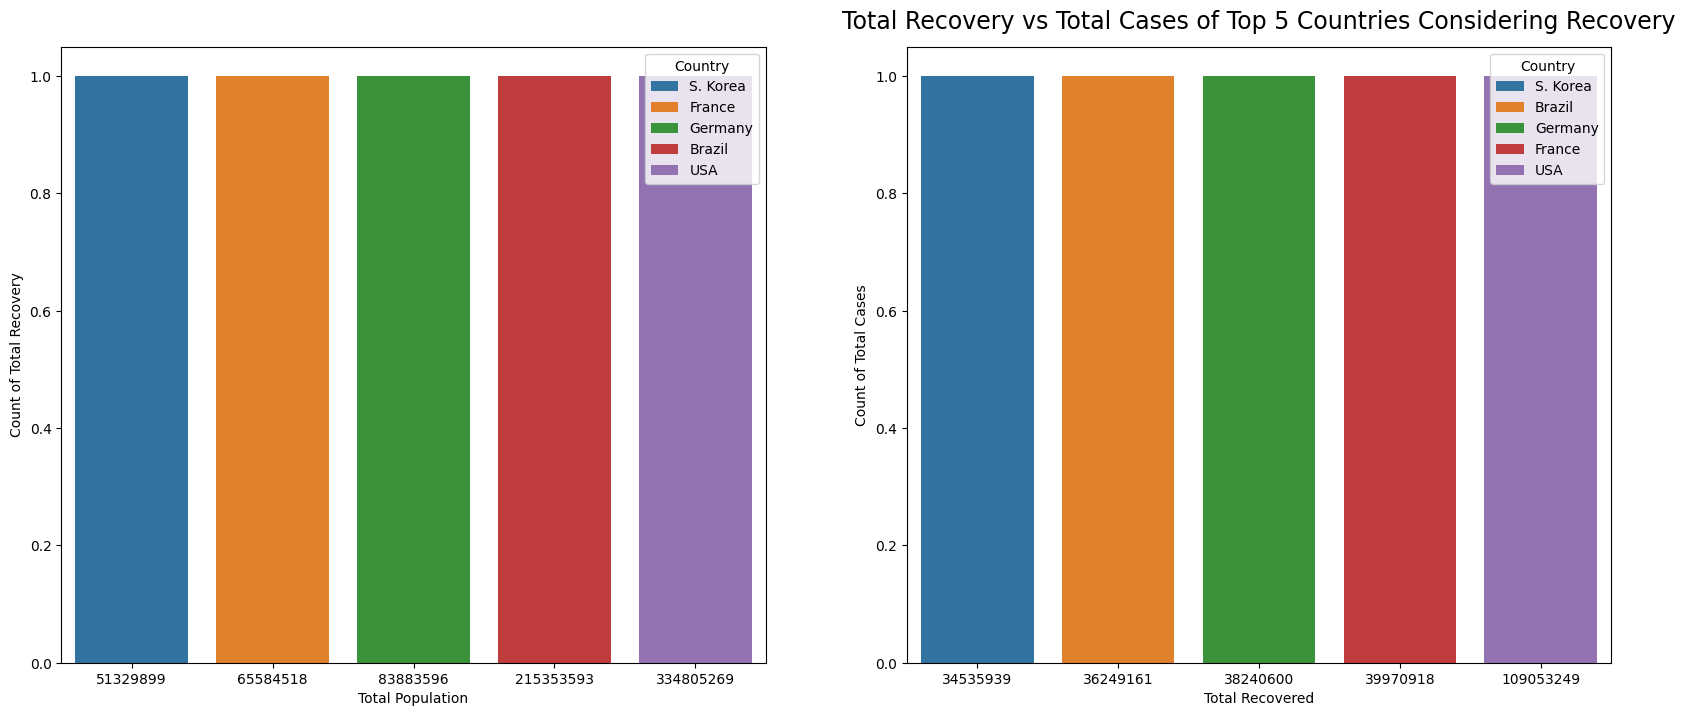

In [194]:
# countplot of total population vs total recovery of top 5 countries considering recovery
df_Trecov = df.sort_values(by='Total Recovered', ascending=False).head(5)

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.countplot(data=df_Trecov, x='Population', hue='Country')
plt.xlabel('Total Population')
plt.ylabel('Count of Total Recovery')
plt.legend(title='Country')

plt.subplot(1, 2, 2)
sns.countplot(data=df_Trecov, x='Total Recovered', hue='Country')
plt.xlabel('Total Recovered')
plt.ylabel('Count of Total Cases')
plt.legend(title='Country')

plt.title("Total Recovery vs Total Cases of Top 5 Countries Considering Recovery", size=17, pad=13)
plt.show()
